In [18]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid", {'axes.grid' : False})
import datetime
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("00_data/data_with_calc_fields.csv", sep=";", decimal=",")
df["datetime"] = pd.to_datetime(df["datetime"])
df = df.set_index("datetime")

In [19]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [20]:
cRange = ['#475468', '#e7e6e6', '#4b73be', '#df8244', '#a5a5a5', '#f7c143',
          '#20406a', '#deeef8', '#2d6fc0', '#409cd4', '#5ccdd7', '#5ecb9e',
          '#a53218', '#c59933', '#f08a40', '#aa4f30', '#f7bf5d', '#d85733',
          '#728083', '#8babb4', '#7196ad', '#607397', '#8585c2', '#a687c1']
colors = ['#475468', '#e7e6e6', '#4b73be', 
          '#df8244', '#a5a5a5', '#f7c143'] 
cmapOffice = mpl.colors.ListedColormap([cRange[i] for i in range(0, 5)])
cmapBlue = mpl.colors.ListedColormap([cRange[i] for i in range(6, 11)])
cmapRed = mpl.colors.ListedColormap([cRange[i] for i in range(12, 17)])
cmapViolett = mpl.colors.ListedColormap([cRange[i] for i in range(18, 23)])

## Distplot

Beim Distplot kann über das 'color'-Attribut einfach die gewünschte Farbe aus der 'cRange' oder aus 'colors' übergeben werden.

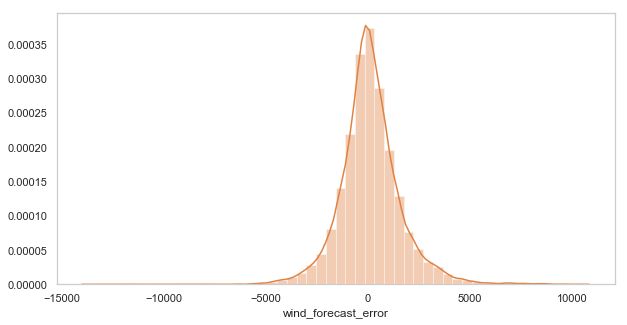

In [25]:
sns.distplot(df["wind_forecast_error"], color=cRange[3]);

## KDE-Plot

Siehe Distplot.

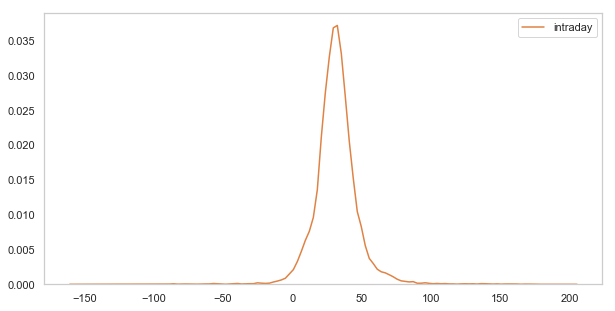

In [26]:
sns.kdeplot(df["intraday_price"], label="intraday", color=cRange[3]);

## Boxplot

Beim Boxplot wird eine iterierbare Liste übergeben (hier die oben spezifizierte Liste 'colors').

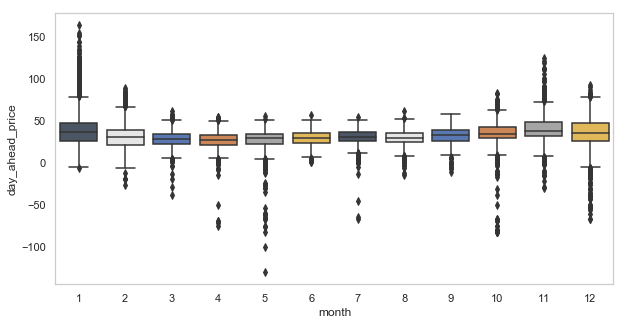

In [31]:
sns.boxplot(x="month", y="day_ahead_price", data=df,  palette=colors);

## Pairplot

Siehe Boxplot.

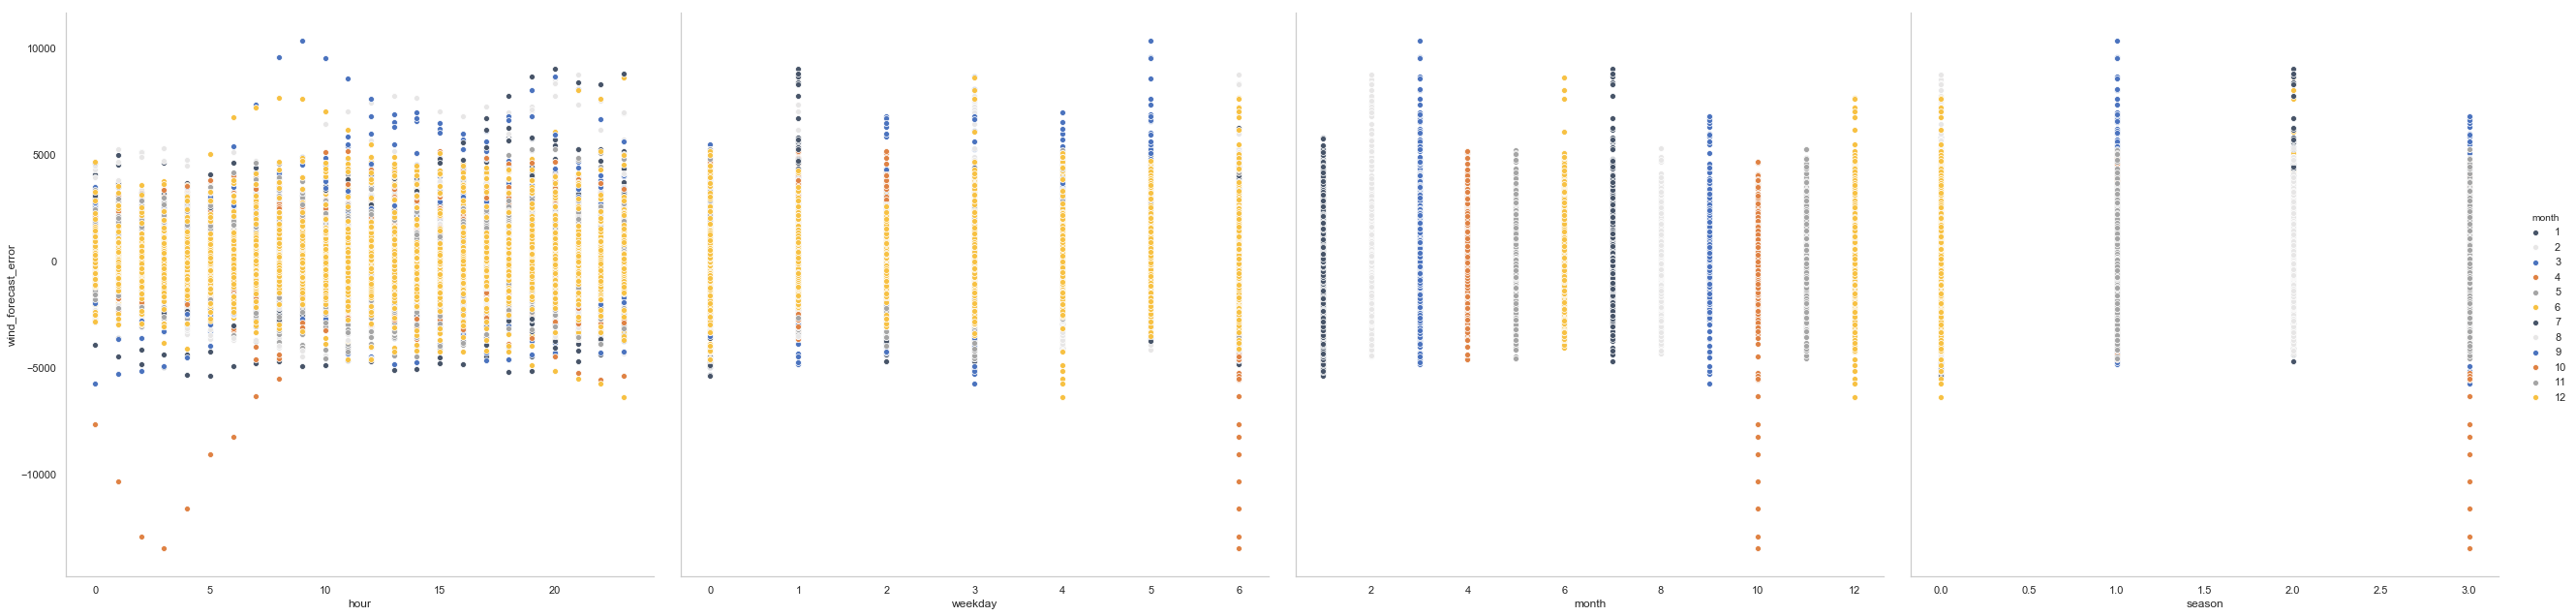

In [34]:
sns.pairplot(df, x_vars=["hour", "weekday", "month", "season"], 
             y_vars="wind_forecast_error", hue="month", 
             diag_kind = 'kde', height=9, palette=colors);

## Lineplot

Da der Seaborn Lineplot keinen Input 'cmap' oder 'colors' hat, muss die Linie hier über das Line2D-Objekt angepasst werden. Mit cRange[index] kann eine beliebige Farbe aus den Farben in cRange gewählt werden.

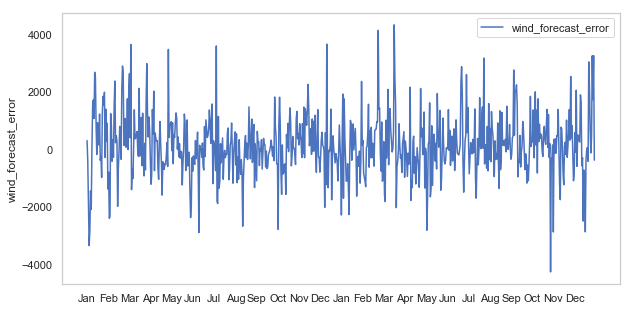

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(x="date", y="wind_forecast_error", data=df, ax=ax, label="wind_forecast_error", ci=None)
ax.legend()
ax.set_xlabel("")
ax.set_ylabel("wind_forecast_error")
ax.set_xticks(np.arange(720, step=30.5))
ax.set_xticklabels(2*[month for month in months])
for child in ax.findobj(Line2D):
    if child.get_label() == "wind_forecast_error":
        child.set_color(cRange[2]);